Imports

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk

Matplotlib is building the font cache; this may take a moment.


In [3]:
%matplotlib inline
plt.style.use('ggplot')


Setting paths

In [4]:
BASE_PATH = r"F:\acouslic-ai-train-set"
IMAGE_PATH = os.path.join(BASE_PATH, "images", "stacked_fetal_ultrasound")
MASK_PATH = os.path.join(BASE_PATH, "masks", "stacked_fetal_abdomen")

print("Image path:", IMAGE_PATH)
print("Mask path:", MASK_PATH)

Image path: F:\acouslic-ai-train-set\images\stacked_fetal_ultrasound
Mask path: F:\acouslic-ai-train-set\masks\stacked_fetal_abdomen


Helper function to read MHA

In [5]:
def read_mha(path):
    image = sitk.ReadImage(path)
    array = sitk.GetArrayFromImage(image)
    return array

Loading a few cases

In [10]:
all_files = sorted([f for f in os.listdir(IMAGE_PATH) if f.endswith(".mha")])
print(f"Total cases found: {len(all_files)}")

sample_cases = all_files[:5]

Total cases found: 300


Visualizing image-mask pairs

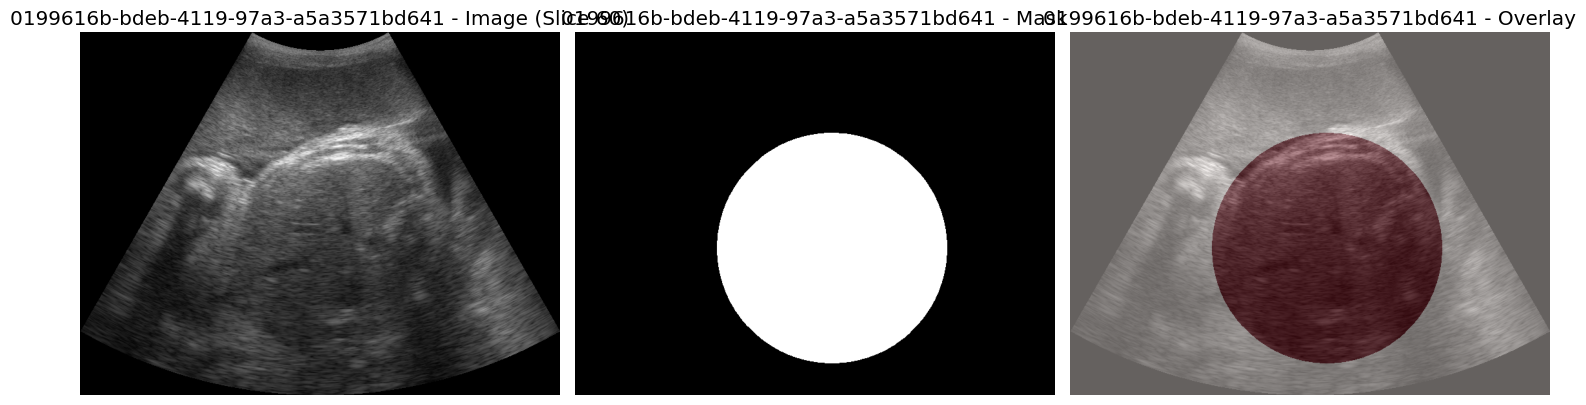

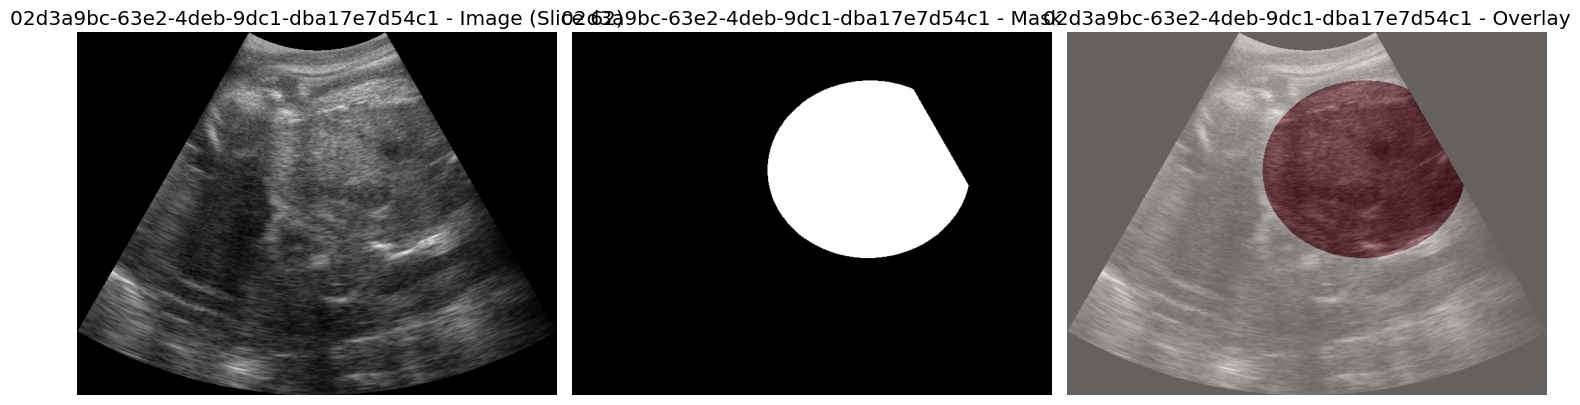

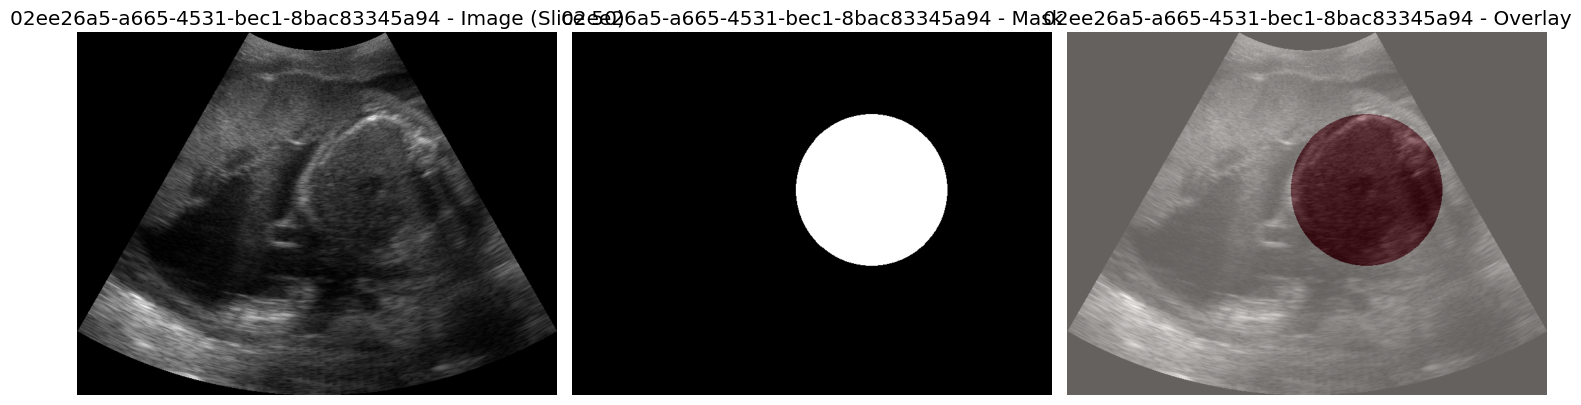

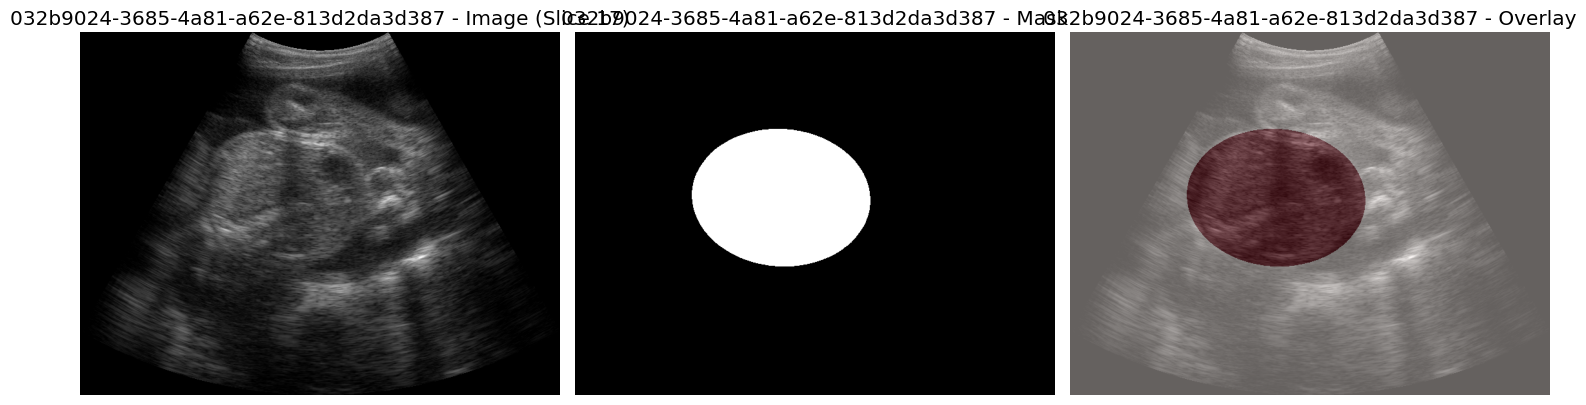

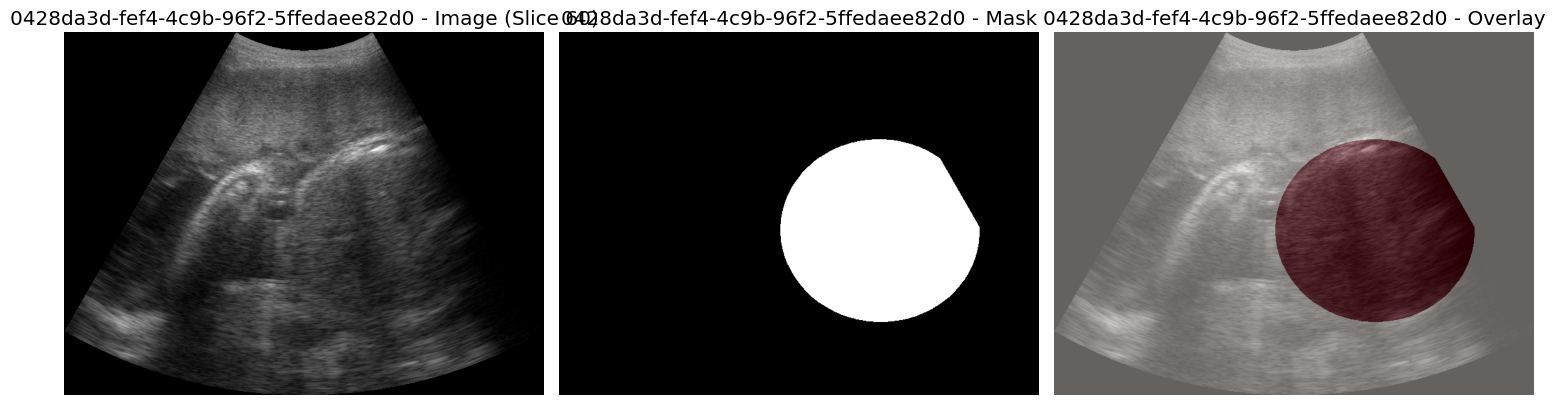

In [ ]:
for file in sample_cases:
    case_id = file.split('.')[0]
    
    image_path = os.path.join(IMAGE_PATH, file)
    mask_path = os.path.join(MASK_PATH, file)
    
    image = read_mha(image_path)
    mask = read_mha(mask_path)
    
    # Looping through slices and finding a non-empty mask
    for i in range(mask.shape[0]):
        if np.any(mask[i]):
            img_slice = image[i]
            mask_slice = mask[i]

            fig, axs = plt.subplots(1, 3, figsize=(15, 5))
            axs[0].imshow(img_slice, cmap='gray')
            axs[0].set_title(f"{case_id} - Image (Slice {i})")
            axs[1].imshow(mask_slice, cmap='gray')
            axs[1].set_title(f"{case_id} - Mask")
            axs[2].imshow(img_slice, cmap='gray')
            axs[2].imshow(mask_slice, alpha=0.4, cmap='Reds')
            axs[2].set_title(f"{case_id} - Overlay")
            for ax in axs:
                ax.axis('off')
            plt.tight_layout()
            plt.show()
            break  # show only first slice with a label
